In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
matplotlib.rcParams.update({'font.size': 20})

In [1]:
from virgodb import VirgoDB
vdb = VirgoDB("giorgio",password="BN401kmd")

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 

-- Select all progenitors of a particular galaxy


select *

from Gonzalez2014a..mr7 as prog, Gonzalez2014a..mr7 as des

where des.galaxyid = 0 and prog.galaxyid between des.galaxyid and des.lastprogenitorid

In [19]:
s1 = "select prog.mag_V_ext,prog.SDSS_u_ext,prog.SDSS_i_obs_ext,prog.stellarmass,prog.type,prog.mdhalo,prog.z,prog.redshift "

s2 = "from Gonzalez2014a..mr7 as prog "
s3 = "where prog.galaxyid = 0 and prog.galaxyid between prog.galaxyid and prog.lastprogenitorid"

s = s1 + s2 + s3
###################################
#This one seems to work
###################################
ss_1 = s1
ss_2 = "from Gonzalez2014a..mr7 as prog, Gonzalez2014a..mr7 as des "
ss_3 = "where des.galaxyid = 0 and prog.galaxyid between des.galaxyid and des.lastprogenitorid"

ss= ss_1 + ss_2 + ss_3

data = vdb.execute_query(ss)

#vdb.execute_query("select * from Gonzalez2014a..mr7 as prog, Gonzalez2014a..mr7 as des where des.galaxyid = 0 and prog.galaxyid between des.galaxyid and des.lastprogenitorid")

In [13]:
data

rec.array([(-20.814426, -19.427666, -21.420856, 4.1742125e+00, 0, 45.515327 , 423.66678),
           (-20.836658, -19.461388, -21.394789, 4.0891056e+00, 0, 45.51487  , 423.5343 ),
           (-20.859919, -19.495369, -21.371803, 3.9988086e+00, 0, 45.514416 , 423.3916 ),
           (-20.88418 , -19.529478, -21.347761, 3.9033194e+00, 0, 45.513958 , 423.2315 ),
           (-20.908434, -19.565462, -21.317844, 3.8026707e+00, 0, 45.513504 , 423.06198),
           (-20.932034, -19.600449, -21.287758, 3.6968808e+00, 0, 45.51305  , 422.87616),
           (-20.95491 , -19.636375, -21.267445, 3.5859671e+00, 0, 45.512592 , 422.6872 ),
           (-20.975924, -19.669722, -21.251572, 3.4699440e+00, 0, 45.51214  , 422.48206),
           (-20.99251 , -19.698929, -21.228218, 3.3488443e+00, 0, 45.51168  , 422.27197),
           (-21.003931, -19.721273, -21.196571, 3.2228310e+00, 0, 45.511227 , 422.04477),
           (-21.002901, -19.727795, -21.14834 , 3.0926962e+00, 0, 45.510773 , 421.81943),
          

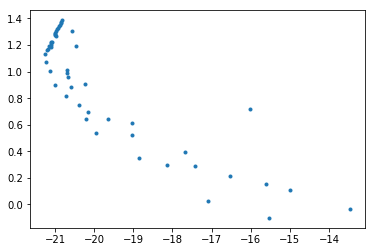

In [16]:
plt.plot(data['mag_V_ext'],data['SDSS_u_ext']-data['mag_V_ext'],".")

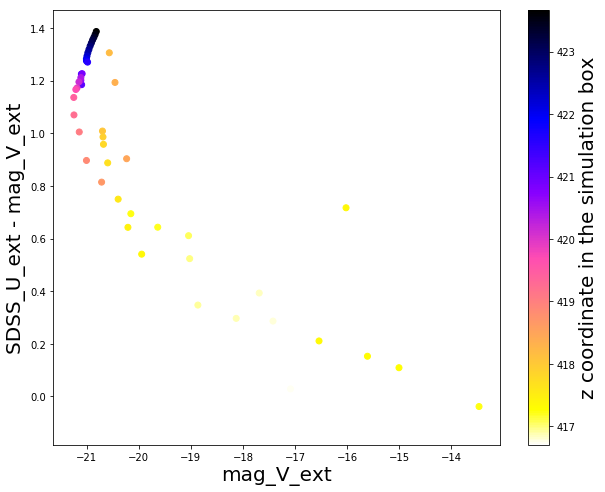

In [42]:
plt.figure(figsize=(10,8))
plt.scatter(data['mag_V_ext'],data['SDSS_u_ext']-data['mag_V_ext'],c=data['z'],cmap='gnuplot2_r')
plt.colorbar(label='z coordinate in the simulation box')
plt.xlabel("mag_V_ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.show()

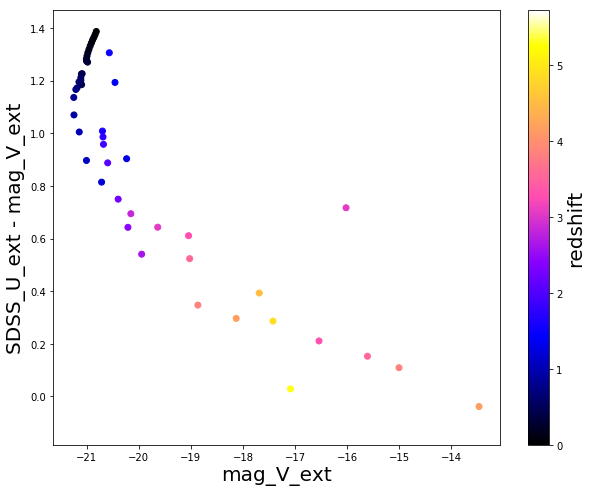

In [45]:
plt.figure(figsize=(10,8))
plt.scatter(data['mag_V_ext'],data['SDSS_u_ext']-data['mag_V_ext'],c=data['redshift'],cmap='gnuplot2')
plt.colorbar(label='redshift')
plt.xlabel("mag_V_ext")
plt.ylabel("SDSS_U_ext - mag_V_ext")
plt.savefig('../plots/005/colmag_progenitor_evolution.png')
plt.show()